In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-prediction/master_dataset.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/kaggle/input/covid-19-prediction/master_dataset.csv",low_memory=False)

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-26,NaN,CA,43.7080,-79.3073,100.0,male,20_30,178,88,27.7,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,51.0538,-114.1149,5.0,female,30_40,158,54,21.6,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-24,NaN,CA,43.2070,-79.8809,100.0,male,90_100,184,94,27.7,...,1,0,0,0,NaN,NaN,NaN,12.0,14.701,NaN
2020-03-25,NaN,CA,45.6700,-73.6723,5.0,male,60_70,172,96,32.4,...,1,0,0,0,NaN,NaN,NaN,6.0,2.250,NaN
2020-03-24,NaN,CA,49.3233,-123.0751,1.0,male,30_40,166,70,25.4,...,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,NaN,US,36.7915,-108.2421,5.0,male,60_70,180,90,27.7,...,0,0,0,0,NaN,5.0,5.0,5.0,1.081,NaN
2021-02-24,NaN,MX,19.1646,-99.1587,5.0,male,10_20,184,122,36.0,...,0,0,0,0,NaN,15.0,35.0,5.0,0.121,NaN
2021-02-23,EU,RO,44.5072,26.2387,10.0,male,30_40,184,96,28.3,...,0,0,0,0,NaN,5.0,5.0,5.0,0.050,NaN
2021-02-23,EU,DE,48.2462,11.4865,1.0,male,40_50,182,110,33.2,...,1,0,0,0,NaN,5.0,5.0,5.0,0.229,NaN


In [5]:
current_columns = df.columns.tolist()
new_columns = current_columns[1:] + ['empty_column']
df_fixed = df.copy()
df_fixed.columns = new_columns
df = df_fixed.drop('empty_column', axis=1)

In [6]:
df = df[['sex', 'age', 'bmi','smoking','alcohol','cannabis','amphetamines','cocaine','contacts_count','working','rate_reducing_risk_single','rate_reducing_mask','covid19_symptoms','covid19_contact','asthma','kidney_disease','liver_disease','compromised_immune','heart_disease','lung_disease','diabetes','hiv_positive','hypertension','other_chronic','nursing_home','health_worker','covid19_positive']]

In [7]:
def process_age_column(df, age_column='age'):
    """
    Process age column containing string ranges like '20_30' to their average values
    and handle null values by replacing them with mean.
    
    Parameters:
    df: pandas DataFrame
    age_column: str, name of the age column (default='age')
    
    Returns:
    pandas Series with processed age values
    """
    def extract_average(age_str):
        if pd.isna(age_str):
            return np.nan
        try:
            # Split the string on '_' and convert to integers
            start, end = map(int, str(age_str).split('_'))
            return (start + end) / 2
        except:
            return np.nan
    
    # Convert string ranges to averages
    processed_ages = df[age_column].apply(extract_average)
    
    # Replace null values with mean
    mean_age = processed_ages.mean()
    processed_ages = processed_ages.fillna(mean_age)
    
    return processed_ages

df['age'] = process_age_column(df, age_column='age')

In [8]:
categorical_cols = ['sex', 'age', 'smoking', 'alcohol', 'working', 'cannabis', 
                       'amphetamines', 'cocaine']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
numerical_cols = ['bmi', 'contacts_count', 'rate_reducing_mask']
for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

In [10]:
nominal_cols = ['sex', 'smoking', 'working']
df_encoded = pd.get_dummies(df, columns=nominal_cols)
drug_cols = ['cannabis', 'amphetamines', 'cocaine']
for col in drug_cols:
    if col in df_encoded.columns:
        df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
df=df_encoded

In [11]:
df

,age,bmi,alcohol,cannabis,amphetamines,cocaine,contacts_count,rate_reducing_risk_single,rate_reducing_mask,covid19_symptoms,...,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical
2020-03-26,25.0,27.7,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-25,35.0,21.6,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-24,95.0,27.7,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-25,65.0,32.4,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
2020-03-24,35.0,25.4,0.0,-1.0,-1.0,-1.0,7.50856,0,2.817407,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,65.0,27.7,3.0,-1.0,-1.0,-1.0,6.00000,0,4.000000,0,...,False,False,False,False,False,True,False,False,False,False
2021-02-24,15.0,36.0,-1.0,-1.0,-1.0,-1.0,4.00000,0,5.000000,0,...,False,False,False,False,False,False,True,False,False,False
2021-02-23,35.0,28.3,2.0,-1.0,-1.0,-1.0,5.00000,0,4.000000,0,...,False,False,False,True,False,True,False,False,False,False
2021-02-23,45.0,33.2,3.0,-1.0,-1.0,-1.0,5.00000,0,1.000000,0,...,False,True,False,False,False,False,False,True,False,False


In [12]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [13]:
df.columns

Index(['age', 'bmi', 'alcohol', 'cannabis', 'amphetamines', 'cocaine',
       'contacts_count', 'rate_reducing_risk_single', 'rate_reducing_mask',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease',
       'diabetes', 'hiv_positive', 'hypertension', 'other_chronic',
       'nursing_home', 'health_worker', 'covid19_positive', 'sex_female',
       'sex_male', 'sex_other', 'sex_undefined', 'smoking_never',
       'smoking_quit0', 'smoking_quit10', 'smoking_quit5', 'smoking_vape',
       'smoking_yesheavy', 'smoking_yeslight', 'smoking_yesmedium',
       'working_home', 'working_never', 'working_stopped',
       'working_travel critical', 'working_travel non critical'],
      dtype='object')

In [14]:
# Convert boolean columns to int (True becomes 1, False becomes 0)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

def remove_outliers(df, features):
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Exclude target column from features list
cols_to_check = [col for col in df.columns if col != 'covid19_positive']
df = remove_outliers(df, cols_to_check)

=== Stacking Ensemble Classifier ===
Accuracy: 0.9973826389722655
Precision: 0.9971857858335321
Recall: 0.9976140484825349
F1 Score: 0.997399871186279

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     20689
           1       1.00      1.00      1.00     20956

    accuracy                           1.00     41645
   macro avg       1.00      1.00      1.00     41645
weighted avg       1.00      1.00      1.00     41645


Confusion Matrix:
 [[20630    59]
 [   50 20906]]


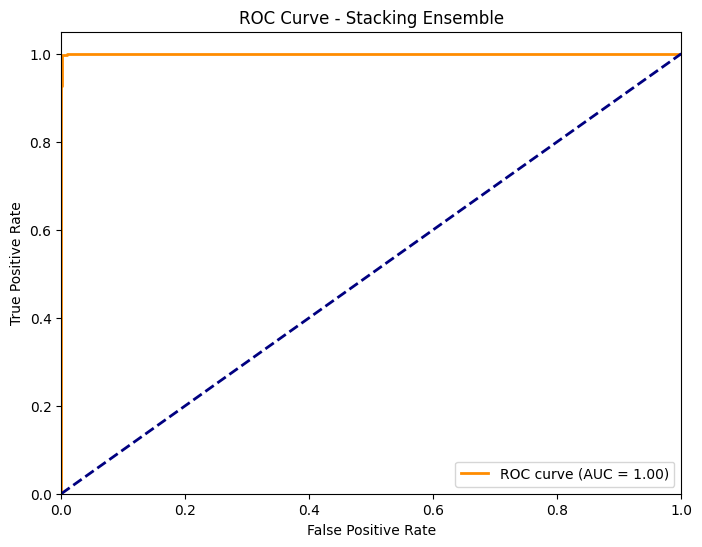

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import (classification_report, accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix, roc_curve, auc)
import matplotlib.pyplot as plt


bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

cols_to_normalize = [col for col in df.columns if col != 'covid19_positive']
scaler = MinMaxScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

X = df[cols_to_normalize]
y = df['covid19_positive']
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=cols_to_normalize)
df_resampled['covid19_positive'] = y_resampled

X = df_resampled.drop('covid19_positive', axis=1).values
y = df_resampled['covid19_positive'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# ---------- Stacking Ensemble ----------
estimators = [
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Stacking classifier: meta-model is logistic regression
stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # use all available cores
    passthrough=True   # pass original features to meta-model
)

stack_clf.fit(X_train, y_train)

y_pred = stack_clf.predict(X_test)
y_pred_prob = stack_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("=== Stacking Ensemble Classifier ===")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", cm)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble')
plt.legend(loc="lower right")
plt.show()
